# Correction of practice 10

In [ ]:
import numpy as np
import sklearn.linear_model as skmod

In [ ]:
#data
x= [6,10,2,3,4,0,7,8,9,1]
y = [130,21,43,76,105,3,167,162,91,15]

In [ ]:
#arrays
arr_x = np.array(x).reshape(-1,1)
arr_y = np.array(y).reshape(-1,1)
print(arr_x)
print(arr_y)

In [ ]:
#square and cube
arr_x2 = arr_x **2
arr_x3 = arr_x **3
print(arr_x3)

In [ ]:
#Linear model

model = skmod.LinearRegression()
model = model.fit(arr_x, arr_y)
print(f"y' = {model.coef_[0][0]}*x + {model.intercept_[0]}")

In [ ]:
#Polynomial model degree 2 
arr_x12 = np.hstack([arr_x, arr_x2])
print(arr_x12)
model2 = skmod.LinearRegression()
model2 = model2.fit(arr_x12, arr_y)
print(" y' = {:.2f}x + {:.2f}*x**2 + {:.2f}".format(model2.coef_[0][0], model2.coef_[0][1], model2.intercept_[0]))

In [ ]:
#Polynomial model degree 3
arr_x123 = np.hstack([arr_x, arr_x2, arr_x3])
print(arr_x123)
model2 = skmod.LinearRegression()
model2 = model2.fit(arr_x123, arr_y)
print(" y' = {:.2f}x + {:.2f}*x**2 + {:.2f}*x**3 + {:.2f}".format(model2.coef_[0][0], model2.coef_[0][1], model2.coef_[0][2], model2.intercept_[0]))

In [ ]:
degree = 5

# Lecture 11: Machine Learning III

In [11]:
#import some package
import sklearn.linear_model as skmod
import sklearn.preprocessing as skprepro
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection

## The polynomial features object

In [2]:
#Create data and reshape it
x = [1, 2, 3, 4, 5, 6]
x = np.array(x).reshape(-1,1)
print(x)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [3]:
#Create the polynomial feature object from the preprocessing module
#PolynomialFeatures() function
#choose the degree and don't include bias
poly2 = skprepro.PolynomialFeatures(2, include_bias = False)

In [5]:
#Transform your data into features of degree two, fit_transform() function
x = poly2.fit_transform(x)
print(x)

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]]


[[49.10205127]]


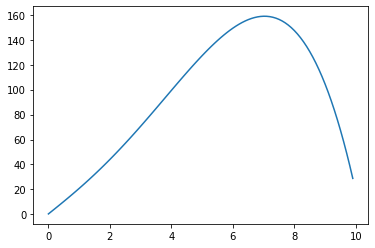

In [12]:
#Your turn (10 minutes) 17:40
#From the data of practice, make a polynomial regression of degree 4
#print the prediction of the model for x = 2.2
x= [6,10,2,3,4,0,7,8,9,1]
y = [130,21,43,76,105,3,167,162,91,15]
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
poly2 = skprepro.PolynomialFeatures(4, include_bias = False)
model = skmod.LinearRegression().fit(poly2.fit_transform(x), y)
print(model.predict(poly2.fit_transform(np.array([[2.2]]))))

plt.plot(np.arange(0,10,0.1), model.predict(poly2.fit_transform(np.arange(0,10,0.1).reshape(-1,1))) )

## Train and test set

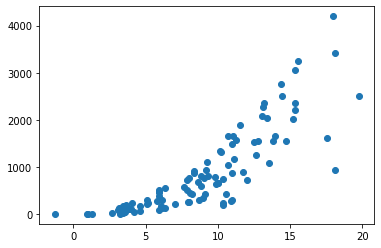

In [32]:
#let's create data, you can check this code at home
data_x = np.random.normal(9, 4, 100)
data_y = np.random.randint(20,180, size = (len(data_x)))/100*(data_x*data_x*8 + 2*data_x + 5)
data_x = data_x.reshape(-1,1)
data_y = data_y.reshape(-1,1)

plt.scatter(data_x, data_y)
# print(data_x)
# print(data_y)

In [33]:
#Let's keep 20 % of our data aside
data_x_train = data_x[:80]
data_y_train = data_y[:80]
data_x_test = data_x[80:]
data_y_test = data_y[80:]
# plt.scatter(data_x_train, data_y_train)
# plt.scatter(data_x_test, data_y_test)

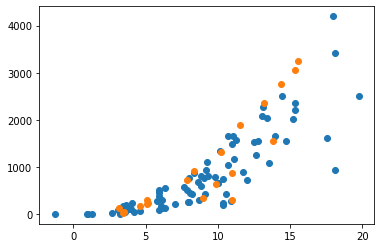

In [59]:
#choose a test and train set with scikit-learn:
#import sklearn.model_selection and use the train_test_split() function
#The order is train/test, train/test
import sklearn.model_selection as sksel

data_x_train, data_x_test, data_y_train, data_y_test = sksel.train_test_split(data_x,
                                                                              data_y,
                                                                             train_size = 0.80,
                                                                             shuffle = True)

plt.scatter(data_x_train, data_y_train)
plt.scatter(data_x_test, data_y_test)

In [60]:
#Let's use the Polynomial transform of the sklearn.preprocessing module
poly2 = skprepro.PolynomialFeatures(2, include_bias = False)
poly8 = skprepro.PolynomialFeatures(8, include_bias = False)

In [61]:
#let's make our regression of degree 2

data_x2_train = poly2.fit_transform(data_x_train)
model2 = skmod.LinearRegression().fit(data_x2_train, data_y_train)


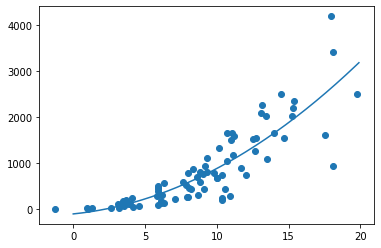

In [62]:
#Let's plot our result
plt.scatter(data_x_train, data_y_train)
plt.plot(np.arange(0,20,0.1), model2.predict(poly2.fit_transform(np.arange(0,20,0.1).reshape(-1,1))) )

In [63]:
#Let's do for all regression for degree 8
data_x8_train = poly8.fit_transform(data_x_train)
model8 = skmod.LinearRegression().fit(data_x8_train, data_y_train)


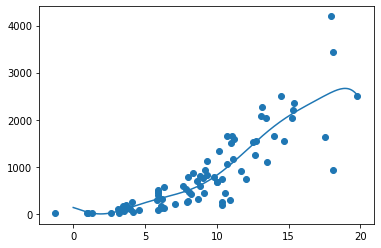

In [64]:
#Let's plot all models
plt.scatter(data_x_train, data_y_train)
plt.plot(np.arange(0,20,0.1), model8.predict(poly8.fit_transform(np.arange(0,20,0.1).reshape(-1,1))) )

In [65]:
#Result of our model of the training set: the score function 
#(1 = perfect fitting, 0 = no fitting at all)
print(model2.score(data_x2_train, data_y_train))
print(model2.score(poly2.fit_transform(data_x_test), data_y_test))
print('-'*10)
print(model8.score(data_x8_train, data_y_train))
print(model8.score(poly8.fit_transform(data_x_test), data_y_test))

0.7363613097445526
0.7124680267034746
----------
0.7547442424973796
0.7756051349695963


In [ ]:
'''
Result of several runs
0.7049219701453895
0.8688648182186212
----------
0.7451913259929662
0.8867452737654837

0.7337286775016486
0.7049869021866328
----------
0.7553884440829808
-0.3086734954428372



'''

## Values scaling

### The logic behind scaling

In [86]:
#Create two features with different size with random (use function np.random.randint())
data_x1 = np.random.randint(10000, 20000, size = (20))
data_x2 = np.random.randint(0, 100, size = (20))
print(data_x1)
print(data_x2)

[13865 14569 11366 12743 15387 13307 14084 15570 12100 13721 19788 16722
 14586 19749 16076 15079 13212 14971 16084 19464]
[75  5 28  1 97 80 28 84 17 48 79 80 27 43 89  7 75 54  9 58]


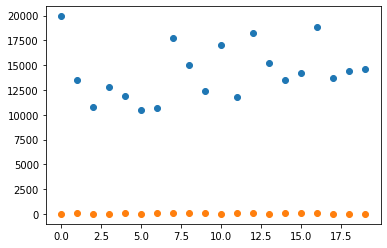

In [68]:
#Let's try to plot it together
plt.scatter(range(0,20), data_x1)
plt.scatter(range(0,20), data_x2)

In [71]:
#We can scale our data with normalization ((x - xmin)/(xmax - xmin))
data_x1_normalized = (data_x1 - min(data_x1))/ (max(data_x1) - min(data_x1))
data_x2_normalized = (data_x2 - min(data_x2))/ (max(data_x2) - min(data_x2))

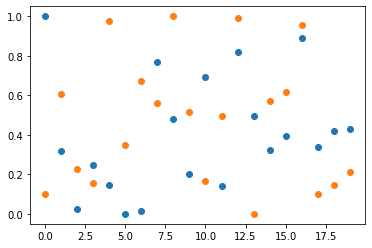

In [72]:
#Let's plot it again

plt.scatter(range(0,20), data_x1_normalized)
plt.scatter(range(0,20), data_x2_normalized)

In [74]:
#We can scale our data with standardization
data_x1_standard = (data_x1 - np.mean(data_x1)) / np.std(data_x1)
data_x2_standard = (data_x2 - np.mean(data_x2)) / np.std(data_x2)

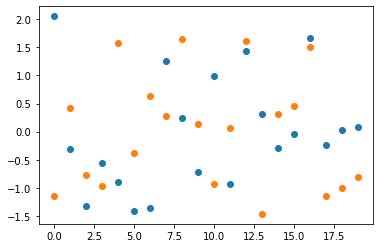

In [75]:
#we can now plot our data

plt.scatter(range(0,20), data_x1_standard)
plt.scatter(range(0,20), data_x2_standard)

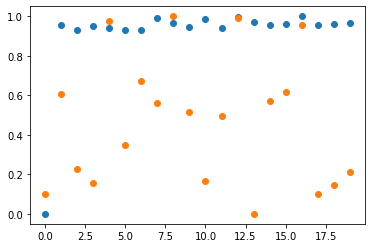

(-1.1, 1.1)

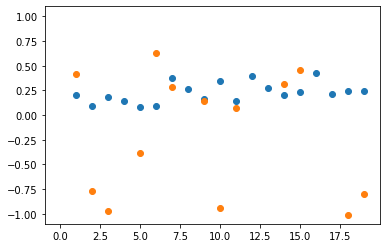

In [79]:
#The difference between normalisation and standardization when there is outliers
#Let's plot it
data_x1[0] = -100000

data_x1_normalized = (data_x1 - min(data_x1))/ (max(data_x1) - min(data_x1))
data_x2_normalized = (data_x2 - min(data_x2))/ (max(data_x2) - min(data_x2))

plt.scatter(range(0,20), data_x1_normalized)
plt.scatter(range(0,20), data_x2_normalized)
plt.show()

data_x1_standard = (data_x1 - np.mean(data_x1)) / np.std(data_x1)
data_x2_standard = (data_x2 - np.mean(data_x2)) / np.std(data_x2)

plt.scatter(range(0,20), data_x1_standard)
plt.scatter(range(0,20), data_x2_standard)
plt.ylim(-1.1,1.1)

### The scikit-learn object

In [87]:
#Create the scaler object StandardScaler() object 
import sklearn.preprocessing as skprepro
scaler_standard = skprepro.StandardScaler()

In [88]:
#prepare our data: 2 columns because 2 features
data_x1 = data_x1.reshape(-1,1)
data_x2 = data_x2.reshape(-1,1)
data_x = np.hstack([data_x1, data_x2])

label =  np.random.randint(0, 100, size = (20))

In [90]:
#use it on your data with the fit_transform()
data_x_stan = scaler_standard.fit_transform(data_x)
print(data_x[:10])
print(data_x_stan[:10])

[[13865    75]
 [14569     5]
 [11366    28]
 [12743     1]
 [15387    97]
 [13307    80]
 [14084    28]
 [15570    84]
 [12100    17]
 [13721    48]]
[[-0.54154264  0.82755241]
 [-0.23828049 -1.41774483]
 [-1.61803715 -0.68000431]
 [-1.02486671 -1.54604753]
 [ 0.11408946  1.53321726]
 [-0.78191236  0.98793079]
 [-0.44720399 -0.68000431]
 [ 0.19292039  1.11623349]
 [-1.30185189 -1.03283673]
 [-0.60357354 -0.03849081]]


In [93]:
#Use inverse_transform method to come back for standardized data to real data
print(scaler_standard.inverse_transform([[0.1, 0.1]]))

[[15354.29238362    52.3176273 ]]


In [102]:
#YOUR TURN (10 minutes)
#On the file in Teams (use copy past to transfer it in python), 
#tranform the three lists in a 10*3 matrix of standardized features
l1 = [22, 85, 96, 81, 68, 97, 29, 61, 73, 86]
l2 = [1489022, 1073767, 1975250, 1493073, 1063635, 1017921, 1206827, 1217274, 1933018, 1325618]
l3 = [-99.67, -99.37, -99.08, -99.54, -99.8, -99.21, -99.73, -99.78, -99.6, -99.48]
l4 = [-182, -254.3,  -71  , -172, -261 , -262, -237, -231, -85, -204]
#76 crosses / 52 students
l1 = np.array(l1).reshape(-1,1)
l2 = np.array(l2).reshape(-1,1)
l3 = np.array(l3).reshape(-1,1)
L = np.hstack([l1, l2, l3])
print(L)
scaler = skprepro.StandardScaler()
L = scaler.fit_transform(L)
print(L)
print(scaler.inverse_transform(L))

[[ 2.200000e+01  1.489022e+06 -9.967000e+01]
 [ 8.500000e+01  1.073767e+06 -9.937000e+01]
 [ 9.600000e+01  1.975250e+06 -9.908000e+01]
 [ 8.100000e+01  1.493073e+06 -9.954000e+01]
 [ 6.800000e+01  1.063635e+06 -9.980000e+01]
 [ 9.700000e+01  1.017921e+06 -9.921000e+01]
 [ 2.900000e+01  1.206827e+06 -9.973000e+01]
 [ 6.100000e+01  1.217274e+06 -9.978000e+01]
 [ 7.300000e+01  1.933018e+06 -9.960000e+01]
 [ 8.600000e+01  1.325618e+06 -9.948000e+01]]
[[-1.93765385  0.33481781 -0.62382688]
 [ 0.61615771 -0.93512067  0.67581245]
 [ 1.06206131  1.82180687  1.93213047]
 [ 0.45401094  0.34720663 -0.06064984]
 [-0.07296604 -0.96610649 -1.18700392]
 [ 1.10259801 -1.10590966  1.36895343]
 [-1.65389701 -0.52819477 -0.88375474]
 [-0.35672288 -0.49624561 -1.1003613 ]
 [ 0.12971741  1.6926524  -0.3205777 ]
 [ 0.6566944  -0.16490652  0.19927803]]
[[ 2.200000e+01  1.489022e+06 -9.967000e+01]
 [ 8.500000e+01  1.073767e+06 -9.937000e+01]
 [ 9.600000e+01  1.975250e+06 -9.908000e+01]
 [ 8.100000e+01  1.4930

In [106]:
#YOUR TURN (5 minutes)
#Make a linear regression with the three features (l1, l2 and l3) and the label (l4)
#with standardized features
# what is the prediction of both model for fatures: [30, 1600000, -99.5]
model = skmod.LinearRegression().fit(L, l4)
print(model.predict(scaler.transform(np.array([[10000, 10, -10]]))))

[1448.41304651]
